In [1]:
%matplotlib inline
from data_extract import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
features, labels = breakData()
all_data = pd.DataFrame(data=features, columns=["DE","RPI","PPG","OR","OE","FGE", "WINP", "EPR", "HighSeed"])
all_data['labels'] = pd.Series(labels, index=all_data.index)

In [3]:
all_data.head()

,DE,RPI,PPG,OR,OE,FGE,WINP,EPR,HighSeed,labels
0,-0.045,0.140,9.3,0.086,0.183,0.065,0.333,0.044,1.0,1.0
1,-0.113,0.023,-6.7,0.128,-0.025,-0.048,0.063,0.077,1.0,1.0
2,-0.027,0.076,-1.3,0.021,0.002,-0.042,-0.008,0.061,1.0,1.0
3,-0.096,0.030,-3.9,0.070,0.052,0.025,0.135,0.019,1.0,2.0
4,-0.010,0.075,-5.4,0.030,-0.011,-0.002,-0.041,-0.005,1.0,1.0


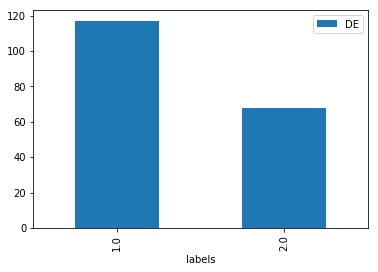

In [4]:
df = all_data.groupby('labels').count()[["DE"]] #Pick a column since they are all the same
df.plot.bar()

labels
1.0    AxesSubplot(0.398529,0.125;0.227941x0.222059)
2.0    AxesSubplot(0.398529,0.125;0.227941x0.222059)
Name: EPR, dtype: object

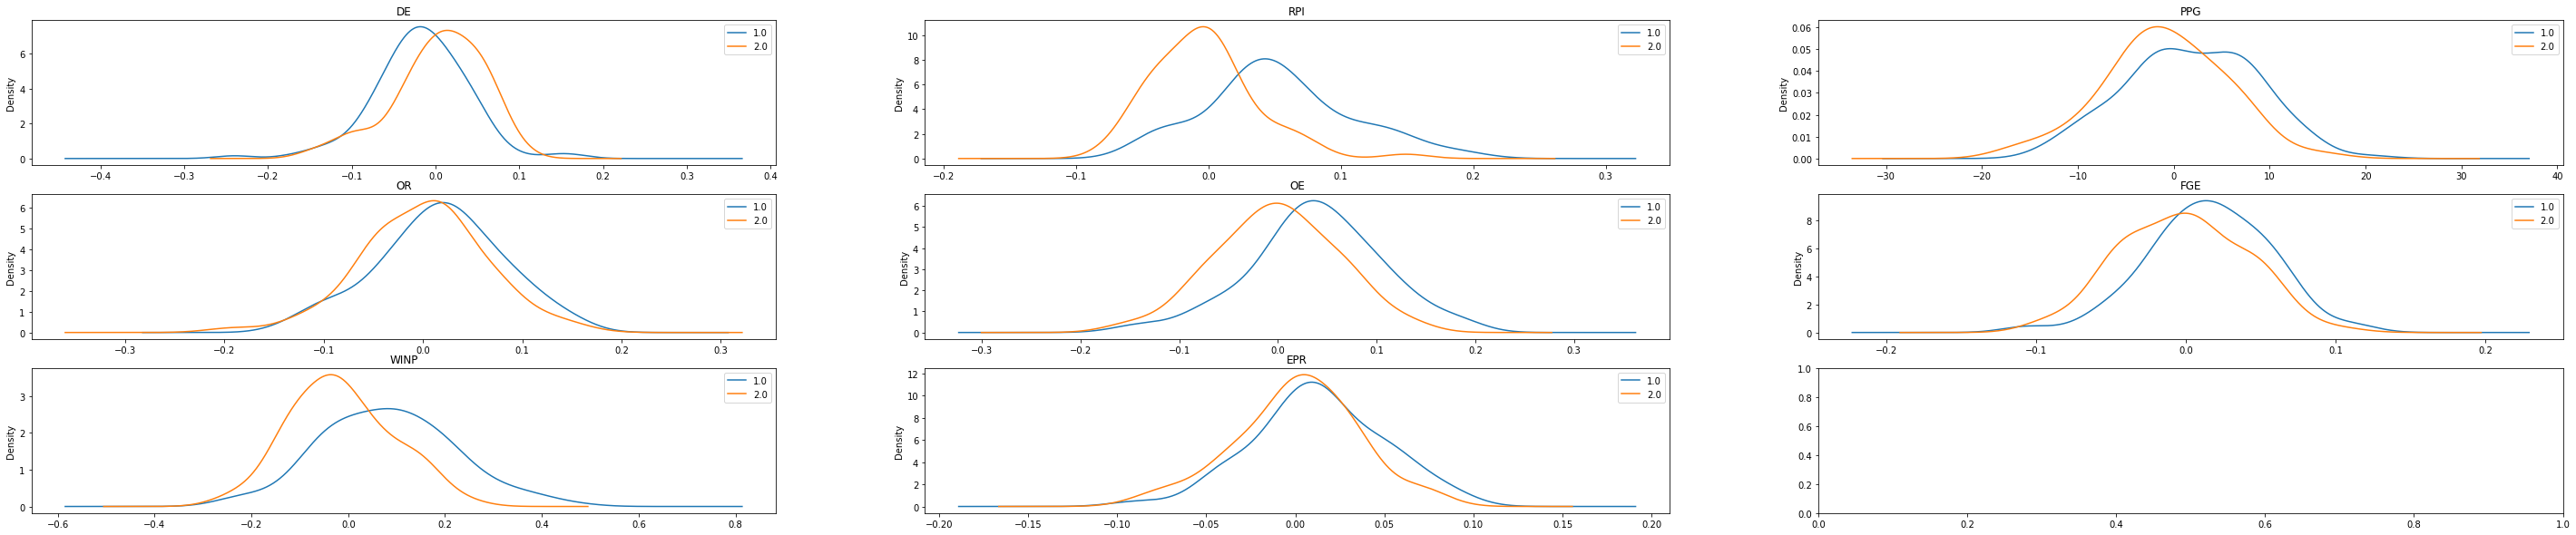

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(50,10))
all_data.groupby("labels").DE.plot(title="DE", kind='kde', ax=axs[0, 0], legend=True)
all_data.groupby("labels").RPI.plot(title="RPI", kind='kde', ax=axs[0, 1], legend=True)
all_data.groupby("labels").PPG.plot(title="PPG", kind='kde', ax=axs[0, 2], legend=True)
all_data.groupby("labels").OR.plot(title="OR", kind='kde', ax=axs[1, 0], legend=True)
all_data.groupby("labels").OE.plot(title="OE", kind='kde', ax=axs[1, 1], legend=True)
all_data.groupby("labels").FGE.plot(title="FGE", kind='kde', ax=axs[1, 2], legend=True)
all_data.groupby("labels").WINP.plot(title="WINP", kind='kde', ax=axs[2, 0], legend=True)
all_data.groupby("labels").EPR.plot(title="EPR", kind='kde', ax=axs[2, 1], legend=True)

In [6]:
pd.crosstab(index=all_data.HighSeed, columns=all_data.labels)

labels,1.0,2.0
HighSeed,,
1.0,99,38
2.0,18,30


# SVM

In [26]:
#Train an SVM on with these parameters
print("Building SVM")
svc = svm.SVC(gamma=0.001)
grid_search_params(svc, features, labels, params={'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10, 100, 1000, 10000]})

Building SVM
Searching Param Space
{'C': 10000, 'kernel': 'linear'}


In [27]:
svc = svm.SVC(gamma=0.001, C=10000, kernel='linear')
check_classifier(svc, features, labels)

Cross-Validating model
[0.78947368 0.68421053 0.73684211 0.84210526 1.         0.57894737
 0.78947368 0.44444444 0.76470588 0.82352941]
Accuracy: 0.75 (+/- 0.14)




# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
print("Building KNN")
knn = KNeighborsClassifier()
grid_search_params(knn, features, labels, params={'n_neighbors':[2, 3, 5, 10]})

Building KNN
Searching Param Space
{'n_neighbors': 10}


In [12]:
knn = KNeighborsClassifier(n_neighbors=10)
check_classifier(knn, features, labels)

Cross-Validating model
[0.68421053 0.52631579 0.68421053 0.63157895 0.68421053 0.63157895
 0.63157895 0.5        0.64705882 0.52941176]
Accuracy: 0.62 (+/- 0.07)




# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
grid_search_params(lr, features, labels, params={'tol':[0.0001, 0.001, 0.01], 'C':[1, 10, 100, 1000]})

Searching Param Space
{'C': 100, 'tol': 0.01}


In [14]:
lr = LogisticRegression(C=100, tol=0.01)
check_classifier(lr, features, labels)

Cross-Validating model
[0.84210526 0.68421053 0.84210526 0.73684211 1.         0.57894737
 0.68421053 0.38888889 0.76470588 0.82352941]
Accuracy: 0.73 (+/- 0.16)




# Adaboost

In [7]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
grid_search_params(clf, features, labels, params={'learning_rate':[0.1, 1, 2, 10]})

Searching Param Space
{'learning_rate': 0.1}


In [8]:
clf = AdaBoostClassifier(learning_rate=0.1)
check_classifier(clf, features, labels)

Cross-Validating model
[0.78947368 0.73684211 0.94736842 0.84210526 1.         0.68421053
 0.73684211 0.44444444 0.82352941 0.64705882]
Accuracy: 0.77 (+/- 0.15)




# Equalizing Class Distribution
Overall, this appears to merely decrease the variance the models rather than increasing the accuracy

In [16]:
from random import *
def swap(value):
    if value == 1:
        return 2
    else:
        return 1

features, labels = breakData()
for i in range(0, len(labels)):
    if random() > 0.5:
        labels[i] = swap(labels[i])
        features[i, 0:8] = -1 * features[i, 0:8]
        features[i, 8] = swap(features[i, 8])

swapped_data = pd.DataFrame(data=features, columns=["DE","RPI","PPG","OR","OE","FGE", "WINP", "EPR", "HighSeed"])
swapped_data['labels'] = pd.Series(labels, index=all_data.index)

In [17]:
swapped_data.head()

,DE,RPI,PPG,OR,OE,FGE,WINP,EPR,HighSeed,labels
0,0.045,-0.140,-9.3,-0.086,-0.183,-0.065,-0.333,-0.044,2.0,2.0
1,-0.113,0.023,-6.7,0.128,-0.025,-0.048,0.063,0.077,1.0,1.0
2,0.027,-0.076,1.3,-0.021,-0.002,0.042,0.008,-0.061,2.0,2.0
3,-0.096,0.030,-3.9,0.070,0.052,0.025,0.135,0.019,1.0,2.0
4,-0.010,0.075,-5.4,0.030,-0.011,-0.002,-0.041,-0.005,1.0,1.0


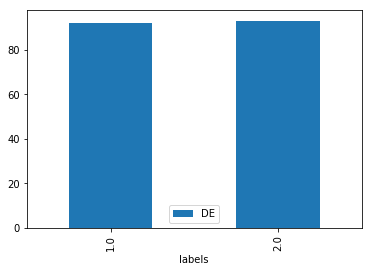

In [18]:
df = swapped_data.groupby('labels').count()[["DE"]] #Pick a column since they are all the same
df.plot.bar()

labels
1.0    AxesSubplot(0.398529,0.125;0.227941x0.222059)
2.0    AxesSubplot(0.398529,0.125;0.227941x0.222059)
Name: EPR, dtype: object

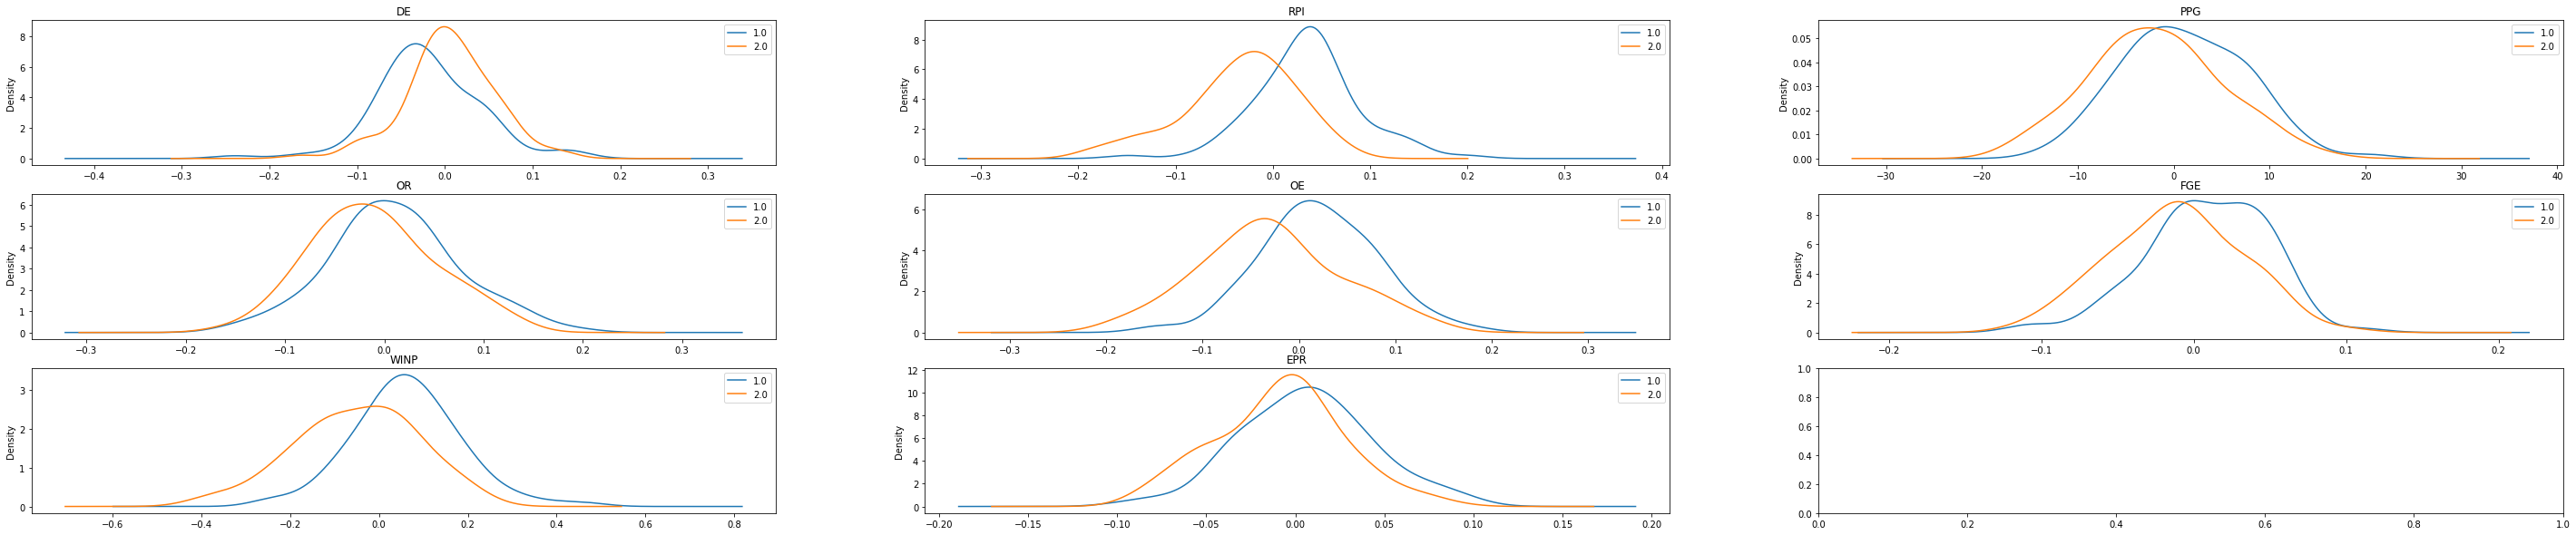

In [19]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(50,10))
swapped_data.groupby("labels").DE.plot(title="DE", kind='kde', ax=axs[0, 0], legend=True)
swapped_data.groupby("labels").RPI.plot(title="RPI", kind='kde', ax=axs[0, 1], legend=True)
swapped_data.groupby("labels").PPG.plot(title="PPG", kind='kde', ax=axs[0, 2], legend=True)
swapped_data.groupby("labels").OR.plot(title="OR", kind='kde', ax=axs[1, 0], legend=True)
swapped_data.groupby("labels").OE.plot(title="OE", kind='kde', ax=axs[1, 1], legend=True)
swapped_data.groupby("labels").FGE.plot(title="FGE", kind='kde', ax=axs[1, 2], legend=True)
swapped_data.groupby("labels").WINP.plot(title="WINP", kind='kde', ax=axs[2, 0], legend=True)
swapped_data.groupby("labels").EPR.plot(title="EPR", kind='kde', ax=axs[2, 1], legend=True)

In [20]:
pd.crosstab(index=swapped_data.HighSeed, columns=swapped_data.labels)

labels,1.0,2.0
HighSeed,,
1.0,67,31
2.0,25,62


# SVM

In [45]:
svc = svm.SVC(gamma=0.001)
grid_search_params(svc, features, labels, params={'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10, 100, 1000, 10000]})

Searching Param Space
{'C': 1000, 'kernel': 'linear'}


In [46]:
svc = svm.SVC(gamma=0.001, C=1000, kernel='linear')
check_classifier(svc, features, labels)

Cross-Validating model
[0.78947368 0.73684211 0.78947368 0.89473684 0.94736842 0.57894737
 0.68421053 0.72222222 0.58823529 0.88235294]
Accuracy: 0.76 (+/- 0.12)




In [47]:
save_classifier(svc, features, labels)

# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
print("Building KNN")
knn = KNeighborsClassifier()
grid_search_params(knn, features, labels, params={'n_neighbors':[2, 3, 5, 10]})

Building KNN
Searching Param Space
{'n_neighbors': 5}


In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
check_classifier(knn, features, labels)

Cross-Validating model
[0.73684211 0.68421053 0.78947368 0.57894737 0.57894737 0.47368421
 0.52631579 0.5        0.58823529 0.58823529]
Accuracy: 0.60 (+/- 0.10)




# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
grid_search_params(lr, features, labels, params={'tol':[0.0001, 0.001, 0.01], 'C':[1, 10, 100, 1000]})

Searching Param Space
{'C': 1000, 'tol': 0.0001}


In [51]:
lr = LogisticRegression(C=1000, tol=0.0001)
check_classifier(lr, features, labels)

Cross-Validating model
[0.73684211 0.73684211 0.68421053 0.89473684 0.94736842 0.63157895
 0.68421053 0.5        0.58823529 0.82352941]
Accuracy: 0.72 (+/- 0.13)




# Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
grid_search_params(clf, features, labels, params={'learning_rate':[0.00001, 0.001, 0.01, 0.1, 1, 10]})

Searching Param Space
{'learning_rate': 1e-05}


In [22]:
clf = AdaBoostClassifier(learning_rate=1e-5)
check_classifier(clf, features, labels)

Cross-Validating model
[0.7        0.65       0.73684211 0.72222222 0.77777778 0.61111111
 0.66666667 0.61111111 0.72222222 0.77777778]
Accuracy: 0.70 (+/- 0.06)




In [23]:
save_classifier(clf, features, labels, name="adaboost_clf.pkl")

# PCA

Overall doesn't change the results in an impactful way

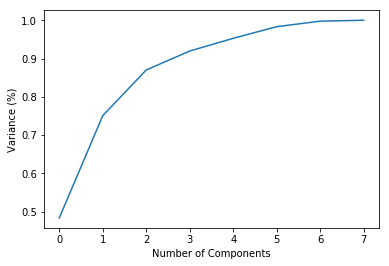

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

features, labels = breakData()
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(features[:, :8])
pca = PCA().fit(data_rescaled)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [23]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)
dataset = np.hstack((dataset, np.reshape(features[:, 8], (len(features[:,8]), 1))))
pca_data = pd.DataFrame(data=dataset, columns=["Comp0","Comp1","Comp2","Comp3", "Comp4","HighSeed",])
pca_data['labels'] = pd.Series(labels, index=all_data.index)
pca_data.head()

,Comp0,Comp1,Comp2,Comp3,Comp4,HighSeed,labels
0,-0.837265,0.103128,0.022859,-0.007791,-0.041432,1.0,1.0
1,0.105732,0.614415,0.131659,-0.109555,-0.014538,1.0,1.0
2,0.032263,0.331405,0.002749,0.168083,0.149607,1.0,1.0
3,-0.122638,0.140339,0.168857,-0.145315,-0.111857,1.0,2.0
4,0.112301,0.060456,0.099300,0.201305,-0.131368,1.0,1.0


labels
1.0    AxesSubplot(0.398529,0.125;0.227941x0.343182)
2.0    AxesSubplot(0.398529,0.125;0.227941x0.343182)
Name: Comp4, dtype: object

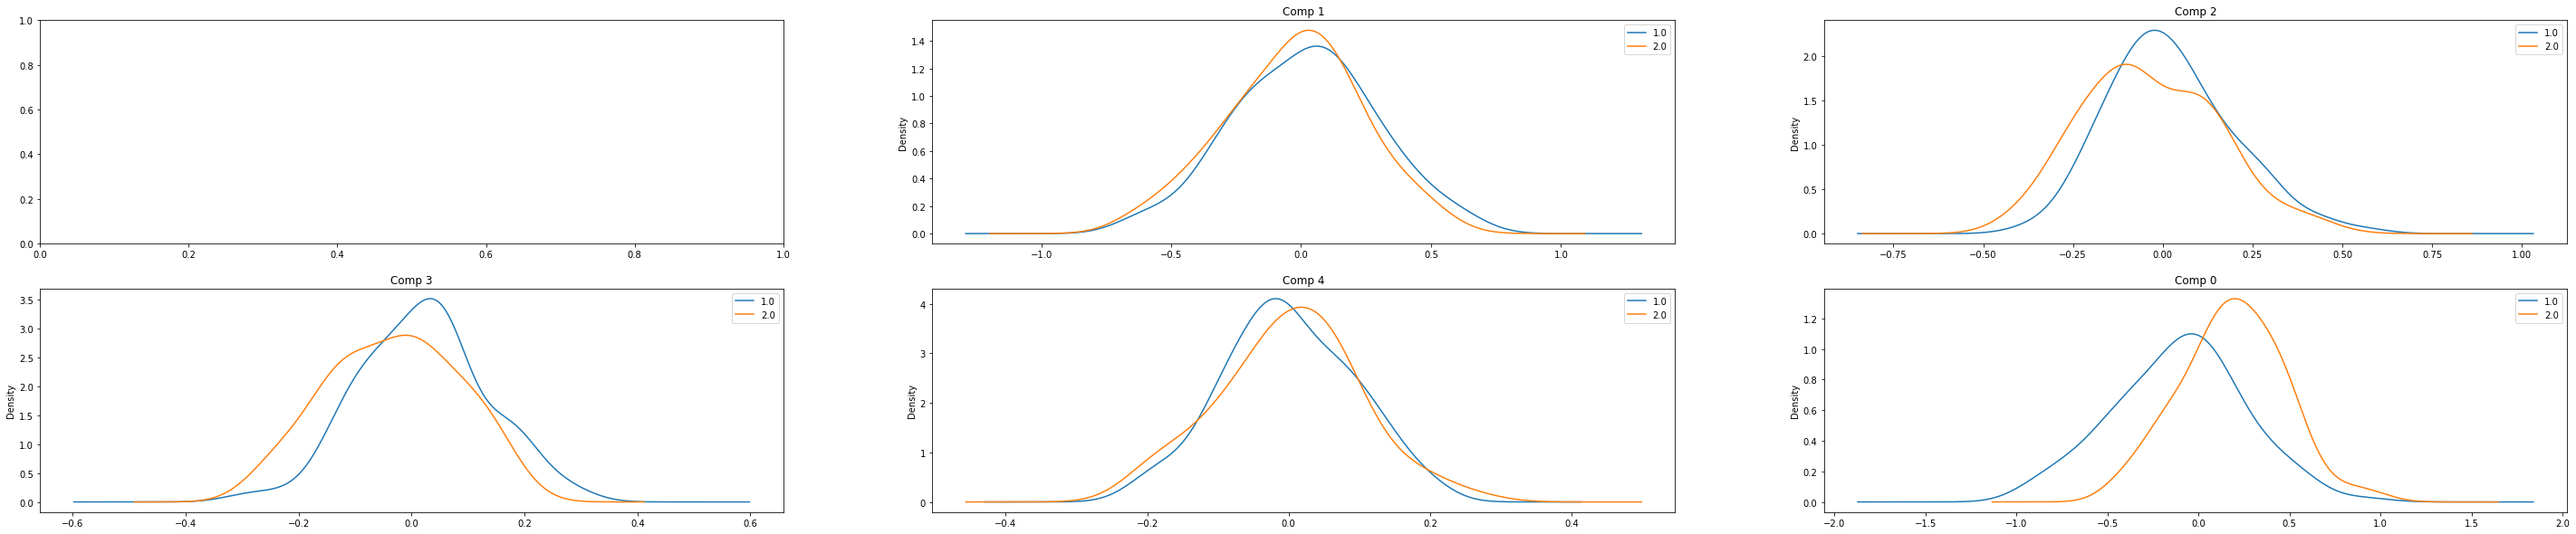

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(50,10))
pca_data.groupby("labels").Comp0.plot(title="Comp 0", kind='kde', legend=True)
pca_data.groupby("labels").Comp1.plot(title="Comp 1", kind='kde', ax=axs[0, 1], legend=True)
pca_data.groupby("labels").Comp2.plot(title="Comp 2", kind='kde', ax=axs[0, 2], legend=True)
pca_data.groupby("labels").Comp3.plot(title="Comp 3", kind='kde', ax=axs[1, 0], legend=True)
pca_data.groupby("labels").Comp4.plot(title="Comp 4", kind='kde', ax=axs[1, 1], legend=True)

# SVM

In [76]:
svc = svm.SVC(gamma=0.001)
grid_search_params(svc, dataset, labels, params={'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10, 100, 1000, 10000]})

Searching Param Space
{'C': 1000, 'kernel': 'linear'}


In [77]:
svc = svm.SVC(gamma=0.001, C=1000, kernel='linear')
check_classifier(svc, features, labels)

Cross-Validating model
[0.73684211 0.68421053 0.78947368 0.89473684 0.94736842 0.68421053
 0.73684211 0.44444444 0.70588235 0.82352941]
Accuracy: 0.74 (+/- 0.13)




# KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
print("Building KNN")
knn = KNeighborsClassifier()
grid_search_params(knn, dataset, labels, params={'n_neighbors':[2, 3, 5, 10]})

Building KNN
Searching Param Space
{'n_neighbors': 5}


In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
check_classifier(knn, dataset, labels)

Cross-Validating model
[0.57894737 0.47368421 0.89473684 0.73684211 0.84210526 0.68421053
 0.68421053 0.61111111 0.58823529 0.52941176]
Accuracy: 0.66 (+/- 0.13)




# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
grid_search_params(lr, dataset, labels, params={'tol':[0.0001, 0.001, 0.01], 'C':[1, 10, 100, 1000]})

Searching Param Space
{'C': 100, 'tol': 0.0001}


In [84]:
lr = LogisticRegression(C=100, tol=0.0001)
check_classifier(lr, dataset, labels)

Cross-Validating model
[0.73684211 0.68421053 0.84210526 0.78947368 1.         0.68421053
 0.68421053 0.44444444 0.58823529 0.82352941]
Accuracy: 0.73 (+/- 0.14)




# Adaboost

In [25]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
grid_search_params(clf, features, labels, params={'learning_rate':[0.1, 1, 2, 10]})

Searching Param Space
{'learning_rate': 0.1}


In [28]:
clf = AdaBoostClassifier(learning_rate=0.1)
check_classifier(clf, features, labels)

Cross-Validating model
[0.78947368 0.73684211 0.94736842 0.84210526 1.         0.68421053
 0.73684211 0.44444444 0.82352941 0.64705882]
Accuracy: 0.77 (+/- 0.15)


